In [7]:
#import seaborn as sns
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import powerlaw
import matplotlib.colors as mcolors
from operator import itemgetter
from collections import Counter
warnings.filterwarnings('ignore')


In [8]:
#upload dataset
g = nx.read_gexf("../../data_collection/data/RW_Graphs/SCC_weighted_graph.gexf")

In [9]:
g_dir = nx.read_gexf("../../data_collection/data/RW_Graphs/SCC_weighted_graph_di.gexf")

In [10]:
g_undir = nx.read_gexf("../../data_collection/data/RW_Graphs/SCC_weighted_graph_un.gexf")

In [11]:
#remove self-loops, aka people answering to themselves
g.remove_edges_from(nx.selfloop_edges(g))
g_dir.remove_edges_from(nx.selfloop_edges(g_dir))
g_undir.remove_edges_from(nx.selfloop_edges(g_undir))

In [12]:
#build real world (rw) and watts-strogatz (ws) networks
rw=g
rw_dir=g_dir
ws = nx.watts_strogatz_graph(46978, k=4, p=0.8, seed = 42) 
#the number of k and p is chosen so that the number of links is similar to the rw network

In [13]:
er = nx.erdos_renyi_graph(46978, 0.0000787, directed = False, seed = 42) #similar as above, but for random graph

In [14]:
nx.write_gexf(er, "../../data_collection/data/Synthetic_Graphs/ER.gexf") #save graphs

In [15]:
ba = nx.barabasi_albert_graph(46978, 2, seed = 42)

In [16]:
nx.write_gexf(ba, "../../data_collection/data/Synthetic_Graphs/BA.gexf")

In [17]:
nx.write_gexf(ws, "../../data_collection/data/Synthetic_Graphs/WS.gexf")

In [18]:
sequence = [i[1] for i in rw.degree()] #define and create a configuration model graph
cm = nx.configuration_model(sequence)

In [19]:
nx.write_gexf(cm, "../../data_collection/data/Synthetic_Graphs/CM.gexf")

In [20]:
def find_hubs(G, degree_threshold):
    '''Function for extracting hubs and not hubs from the network'''
    hubs = []
    notHubs = []
    for i in G:
        if G.degree(i) >= degree_threshold:
            hubs.append(i)
        else:
            notHubs.append(i)
    print(len(hubs))
    return hubs, notHubs

def print_network_info(g):
    '''Function to print info about the network'''
    n_nodes = g.number_of_nodes()
    n_edges = g.number_of_edges()
    print ("Number of nodes: ", n_nodes)
    print ("Number of edges: ", n_edges)
    print ("Number of self-loop: ", nx.number_of_selfloops(g))
    print("Is directed graph: ", g.is_directed())
    l_max = ((n_nodes) * (n_nodes - 1)) / 2
    print("LMAX: ", l_max)
    avg_degree = (2*n_edges)/n_nodes
   # print("clustering coeff ", clust_coeff_density_info(g))
    print("Average degree: ", avg_degree)
  #  print("Shortest path ", nx.shortest_path_length(g, source = 0))


def clust_coeff_density_info(g):
    print("Average clustering coeff: ", nx.average_clustering(g))
    
    
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    

    
def draw_graph(g):
    plt.figure(figsize=(17,16))
    pos = nx.spring_layout(g, k =5)
    M = g.number_of_edges()
    edge_colors = range(2, M + 2)
    nodes = nx.draw_networkx_nodes(g, pos,node_size=300, node_color="#AAAAFF")
    edges = nx.draw_networkx_edges(g,pos,arrowstyle="->", arrowsize=8,  
                                   edge_color=edge_colors,
                                   edge_cmap='tab10', width = 1)
    nx.draw_networkx_labels(g, pos, font_size=20, font_color="black")
    plt.tight_layout()
    plt.show()
    
    
def degree_dist_plot(graphs):
    fig = plt.figure(figsize=(16,8))
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dictionary node:degree
        else:
            degrees = i[0].degree() # dictionary node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o',linestyle='-.',markersize='4') # in-degree
        else:
            plt.loglog(values, hist, 'o',linestyle='-',markersize='3') # in-degree
    fontsize = 15
    
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xlim([0, 2*10**2])
    plt.savefig('degree_distribution_comparison.pdf',format='pdf')
    plt.show()

In [21]:
network_list = [ws, er, ba, rw, cm]
network_names = ["Watts Strogats", "Erdos-Renyi", "Barabasi Albert", "Real World", "Configuration Model"]

# Degree Distribution

In [22]:
for net, net_name in zip(network_list, network_names):
    print(f"\nModel: {net_name}\n----------------------------")
    print_network_info(net)



Model: Watts Strogats
----------------------------
Number of nodes:  46978
Number of edges:  93956
Number of self-loop:  0
Is directed graph:  False
LMAX:  1103442753.0
Average degree:  4.0

Model: Erdos-Renyi
----------------------------
Number of nodes:  46978
Number of edges:  86768
Number of self-loop:  0
Is directed graph:  False
LMAX:  1103442753.0
Average degree:  3.6939844182383244

Model: Barabasi Albert
----------------------------
Number of nodes:  46978
Number of edges:  93952
Number of self-loop:  0
Is directed graph:  False
LMAX:  1103442753.0
Average degree:  3.9998297075226703

Model: Real World
----------------------------
Number of nodes:  46978
Number of edges:  88029
Number of self-loop:  0
Is directed graph:  False
LMAX:  1103442753.0
Average degree:  3.747669121716548

Model: Configuration Model
----------------------------
Number of nodes:  46978
Number of edges:  88029
Number of self-loop:  1051
Is directed graph:  False
LMAX:  1103442753.0
Average degree:  3.7

In [23]:
print_network_info(g)

Number of nodes:  46978
Number of edges:  88029
Number of self-loop:  0
Is directed graph:  False
LMAX:  1103442753.0
Average degree:  3.747669121716548


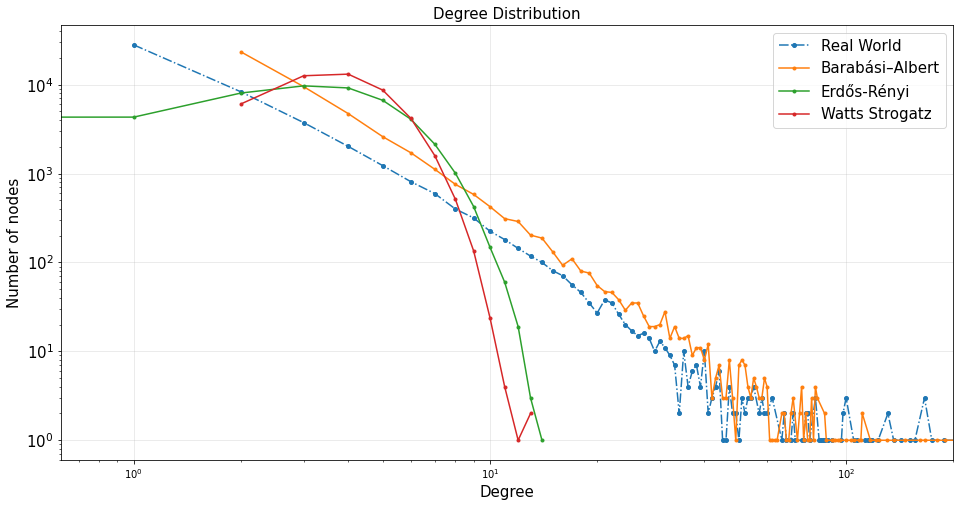

In [24]:
graphs = [(rw, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"), (ws, "Watts Strogatz")]
degree_dist_plot(graphs)

# Connected Components


In [25]:
comps = list(nx.connected_components(rw.to_undirected()))
print("Number of connected components (RW): ", len(comps))

Number of connected components (RW):  1


In [26]:
comps = list(nx.connected_components(er.to_undirected()))
print("Number of Connected Components (ER): ", len(comps))

Number of Connected Components (ER):  1214


In [27]:
comps = list(nx.connected_components(ws))
print("Number of Connected Components (WS): ", len(comps))

Number of Connected Components (WS):  1


In [28]:
comps = list(nx.connected_components(ba))
print("Number of Connected Components (BA): ", len(comps))

Number of Connected Components (BA):  1


In [29]:
comps = list(nx.connected_components(cm))
print("Number of Connected Components (CM): ", len(comps))


Number of Connected Components (CM):  2470


In [30]:
ER_dir = nx.MultiGraph(rw)
ER_components = list(nx.connected_components(ER_dir))
print('Number of connected components (ER): ', len(ER_components))
ER_biggest_component = len(ER_components[0])
print('Size of the biggest component (ER): ', ER_biggest_component)


Number of connected components (ER):  1
Size of the biggest component (ER):  46978


In [31]:
BA_dir = nx.MultiGraph(ba)
BA_components = list(nx.connected_components(BA_dir))
print('Number of connected components (ER): ', len(BA_components))
BA_biggest_component = len(BA_components[0])
print('Size of the biggest component (ER): ', BA_biggest_component)


Number of connected components (ER):  1
Size of the biggest component (ER):  46978


In [32]:
WS_dir = nx.MultiGraph(ws)
WS_components = list(nx.connected_components(WS_dir))
print('Number of connected components (ER): ', len(WS_components))
WS_biggest_component = len(WS_components[0])
print('Size of the biggest component (ER): ', WS_biggest_component)


Number of connected components (ER):  1
Size of the biggest component (ER):  46978


In [33]:
#print('Number weakly connected components (ER): ', str(nx.number_weakly_connected_components(ER_dir)))
#print('Number strongly connected components (ER): ', str(nx.number_strongly_connected_components(ER_dir)))
print('Number weakly connected components (RW): ', str(nx.number_weakly_connected_components(rw_dir)))
print('Number strongly connected components (RW): ', str(nx.number_strongly_connected_components(rw_dir)))

Number weakly connected components (RW):  1
Number strongly connected components (RW):  1


# Clustering Coefficient

In [34]:
def clust_coeff_density_info(g):
    print("Average clustering coeff: ", nx.average_clustering(g))
    print("Density': ", nx.density(g))

In [35]:
print("RW:  \n\t", clust_coeff_density_info(rw), "\n")
print("WS:  \n\t", clust_coeff_density_info(ws), "\n")
print("ER:  \n\t", clust_coeff_density_info(er), "\n")
print("BA:  \n\t", clust_coeff_density_info(ba), "\n")
cm_g = nx.Graph(cm)
print("CM:  \n\t", clust_coeff_density_info(cm_g))


Average clustering coeff:  0.07778606428202861
Density':  7.977668053976517e-05
RW:  
	 None 

Average clustering coeff:  0.004408595482076653
Density':  8.514805117397876e-05
WS:  
	 None 

Average clustering coeff:  5.9348955640836946e-05
Density':  7.863389357000925e-05
ER:  
	 None 

Average clustering coeff:  0.0014225737738202794
Density':  8.51444261558352e-05
BA:  
	 None 

Average clustering coeff:  0.07088670333752317
Density':  6.714077354586604e-05
CM:  
	 None


# Path Analysis

In [36]:
def sample_data(g): 
    degree_calc = {node: val for (node, val) in g.degree()} #calculate degree for every node
    degree = dict(sorted(degree_calc.items(), key=lambda item: item[1], reverse = True))
    sample = []
    for k, v in degree.items():
        if(v >=  1):
            sample.append(k) 
    g = nx.to_undirected(g)
    sample_data = g.subgraph(sample)
    return sample_data



In [37]:
#keep only giant component
Gcc = sorted(nx.connected_components(rw.to_undirected()), key=len, reverse=True)
rw.remove_nodes_from([n for n in rw if n not in set(Gcc[0])])

In [38]:
from random import sample

#build a new graph with sampled nodes. This process is necessary because the path analysis algorithm 
#are too slow on the full-size network

G = rw.to_undirected().copy()
conn_comps = sorted(nx.connected_components(G), key=len, reverse=True) 
G.remove_nodes_from([n for n in G if n not in set(conn_comps[0])])

sampled_nodes = sample(G.nodes, 20000)  
G.remove_nodes_from([n for n in G if n not in set(sampled_nodes)])

#as above, we keep only the giant component of the sampled nodes

conn_comps_sample = sorted(nx.connected_components(G), key=len, reverse=True)
G.remove_nodes_from([n for n in G if n not in set(conn_comps_sample[0])])

In [39]:
#Real World
comps = list(nx.connected_components(G))
print("Number of Connected Components (g): ", len(comps))

#max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
print("Average shortest path (g):", nx.average_shortest_path_length(G.subgraph(comps[0])))
#print("Average shortest path weighted (g):", nx.average_shortest_path_length(G.subgraph(comps[0])))

Number of Connected Components (g):  1
Average shortest path (g): 3.634225678894813


In [40]:
import random

#Erdos Renyi

er = nx.to_undirected(er)

sampled_nodes = random.sample(er.nodes, 15000)
sampled_graph = er.subgraph(sampled_nodes)

comps = list(nx.connected_components(sampled_graph))
print("Number of Connected Components (g): ", len(comps))



#max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
print("Average shortest path (g):", nx.average_shortest_path_length(sampled_graph.subgraph(comps[0])))
#print("Average shortest path weighted (g):", nx.average_shortest_path_length(er.subgraph(comps[0])))

Number of Connected Components (g):  6190
Average shortest path (g): 32.39344129596942


In [41]:
#Barabasi Albert

ba = nx.to_undirected(ba)

sampled_nodes = random.sample(ba.nodes, 15000)
sampled_graph = ba.subgraph(sampled_nodes)


comps = list(nx.connected_components(sampled_graph))

print("Number of Connected Components (g): ", len(comps))

#max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
print("Average shortest path (g):", nx.average_shortest_path_length(sampled_graph.subgraph(comps[0])))

#print("Average shortest path weighted (g):", nx.average_shortest_path_length(ba.subgraph(comps[0])))

Number of Connected Components (g):  6069
Average shortest path (g): 9.418291120485232


In [42]:
#Configuration Model

cm = nx.to_undirected(cm)

sampled_nodes = random.sample(cm.nodes, 15000)
sampled_graph = cm.subgraph(sampled_nodes)


comps = list(nx.connected_components(sampled_graph))
print("Number of Connected Components (g): ", len(comps))

#max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
print("Average shortest path (g):", nx.average_shortest_path_length(sampled_graph.subgraph(comps[0])))
#print("Average shortest path weighted (g):", nx.average_shortest_path_length(cm.subgraph(comps[0])))

Number of Connected Components (g):  9353
Average shortest path (g): 3.986516436587448


In [43]:
#Watts-Stogatz

ws = nx.to_undirected(ws)

sampled_nodes = random.sample(ws.nodes, 15000)
sampled_graph = ws.subgraph(sampled_nodes)


comps = list(nx.connected_components(sampled_graph))
print("Number of Connected Components (g): ", len(comps))

#max([max(j.values()) for (i,j) in nx.shortest_path_length(g)])
print("Average shortest path (g):", nx.average_shortest_path_length(sampled_graph.subgraph(comps[0])))
#print("Average shortest path weighted (g):", nx.average_shortest_path_length(ws.subgraph(comps[0])))

Number of Connected Components (g):  5547
Average shortest path (g): 1.3333333333333333


# Grafo dati analisi

In [44]:
#g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph())
g_cc = nx.Graph(g)


In [45]:
nx.info(g)

'Graph with 46978 nodes and 88029 edges'

In [46]:
#nx.write_gexf(g, "grafoRIF.gexf")

In [47]:
def find_hubs(G, degree_threshold):
    '''Function for extracting hubs and not hubs from the network'''
    hubs = []
    notHubs = []
    for i in G:
        if G.degree(i) >= degree_threshold:
            hubs.append(i)
        else:
            notHubs.append(i)
    print(len(hubs))
    return hubs, notHubs

def print_network_info(g):
    '''Function to print info about the network'''
    n_nodes = g.number_of_nodes()
    n_edges = g.number_of_edges()
    print ("Number of nodes: ", n_nodes)
    print ("Number of edges: ", n_edges)
    print ("Number of self-loop: ", nx.number_of_selfloops(g))
    print("Is directed graph: ", g.is_directed())
    l_max = ((n_nodes) * (n_nodes - 1)) / 2
    print("Max link number: ", l_max)
    avg_degree = (2*n_edges)/n_nodes
    print("Average degree: ", avg_degree)

def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    

    
def draw_graph(g):
    plt.figure(figsize=(17,16))
    pos = nx.spring_layout(g, k =5)
    M = g.number_of_edges()
    edge_colors = range(2, M + 2)
    nodes = nx.draw_networkx_nodes(g, pos,node_size=300, node_color="#AAAAFF")
    edges = nx.draw_networkx_edges(g,pos,arrowstyle="->", arrowsize=8,  
                                   edge_color=edge_colors,
                                   edge_cmap='tab10', width = 1)
    nx.draw_networkx_labels(g, pos, font_size=20, font_color="black")
    plt.tight_layout()
    plt.show()
    

In [48]:
#basic info of real world network
print_network_info(g)

Number of nodes:  46978
Number of edges:  88029
Number of self-loop:  0
Is directed graph:  False
Max link number:  1103442753.0
Average degree:  3.747669121716548


In [49]:
#print number of hubs of real world network
hubs, notHubs = find_hubs(g, 70)


93


In [50]:
print("Nodes acting as hubs\n----------------------")
for i,k in zip(hubs,range(0,10)):
    print(i)

Nodes acting as hubs
----------------------
AndreaMarano11
giu33liana
maurobiani
fratotolo2
brunieradino
elio_vito
nonsonpago1
pemar2
emmevilla
paolo97745638


In [51]:
labels = {}    
for node in g.nodes():
    if node in hubs:
        #set the node name as the key and the label as its value 
        labels[node] = node 

# Degree Distribution

In [52]:
degree = {node: val for (node, val) in g_undir.degree()}


In [53]:
degree = dict(sorted(degree.items(), key=lambda item: item[1], reverse = True))

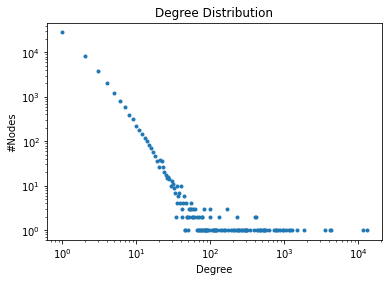

In [54]:
#plot deg distribution
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.savefig('degree_distribution.pdf',format='pdf')

plt.show()

In [55]:
plot_dist(g)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [ ]:
# nodi con più alta degree distribution
dict_items = degree.items()

top10_degree = list(degree)[:10]
for i in top10_degree:
    print(degree[i], i)

In [ ]:
# top 10 nodi in degree distribution
top_indegree = sorted(g_dir.in_degree(),
reverse=True, key=itemgetter(1))[:10]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

In [ ]:
# top 10 nodi out degree distribution
top_outdegree = sorted(g_dir.out_degree(),
reverse=True, key=itemgetter(1))[:10]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_outdegree)))

# Connected Components

In [ ]:
comps = list(nx.connected_components(g.to_undirected()))
print("Number of connected components: ", len(comps))

In [ ]:
comps_sorted = sorted(comps, key=len, reverse = True)

In [ ]:
print("Number of users in the biggest connected component: ", len(max(comps_sorted)))

In [ ]:
print("Number of users in the biggest connected component: ", len(comps_sorted[0]))

In [ ]:
biggest_comp = nx.Graph()
biggest_comp_cc = nx.subgraph(g, comps_sorted[0]) 

In [ ]:
nx.write_gexf(biggest_comp, "biggest_comp_cc.gexf") #write graph of sampled biggest component

# Ego Network

In [ ]:
# find node with 10th largest degree
node_and_degree = g.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-10]

hub_ego = nx.ego_graph(g, largest_hub) #build ego-graph of the node
plt.figure(figsize=(15,15))
# Draw graph
pos = nx.spring_layout(hub_ego, seed=42)  # Seed layout for reproducibility
g_ego = nx.draw(hub_ego, pos, node_color="b", node_size=1, with_labels=Flase)

options = {"node_size": 30, "node_color": "r", }
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

nx.write_graphml(g_ego, "ego_net")

In [ ]:
weakly_connected_comp = sorted(nx.weakly_connected_components(g_dir), reverse=True) 
#the portion of a directed graph in which there is a path from each vertex to another vertex
strongly_connected_comp = sorted(nx.strongly_connected_components(g_dir), reverse=True)

In [ ]:
# strongly connected component with the property that a random walker on the graph will never leave the component, once it enters the component.
len(sorted(nx.attracting_components(g_dir), reverse=True))

In [ ]:
len(strongly_connected_comp)

# Path Analysis

In [56]:
def clust_coeff_density_info(g):
    print("Average clustering coeff: ", nx.average_clustering(g))
    print("Density': ", nx.density(g))

In [57]:
clust_coeff_density_info(g_cc)

Average clustering coeff:  0.07778606428202861
Density':  7.977668053976517e-05


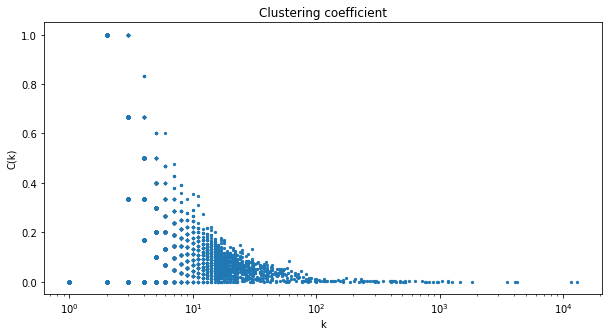

In [58]:
#distribution of clustering coeffient based on the degree k of the node
degrees = g_cc.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(g_cc,node) #calculate local clustering coefficient
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(10,5))
plt.scatter(x, y,s=5)
#plt.markersize('5')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("C(k)")
plt.title("Clustering coefficient")
plt.savefig('cluster_coefficient_distribution.pdf',format='pdf')

plt.show()

# Centrality Analysis

## Degree Centrality

In [ ]:
degrees = dict(g.degree())

In [ ]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]


In [ ]:
def plot_barplot(l, n = 10):
    '''l = list'''
    label = list(zip(*l))[0]
    label_top = label[:n]
    score = list(zip(*l))[1]
    score_top = score[:n]
    plt.figure(figsize=(16,7))
    x_pos = np.arange(len(label_top)) 
    plt.bar(x_pos, score_top)
    plt.xlabel("Twitter users")
    plt.xticks(x_pos, label_top, rotation = 15, fontsize=10) 
    plt.ylabel('Popularity Score', fontsize = 10)
    plt.show()

In [ ]:
plot_barplot(ranks)

## Closeness Centrality

In [ ]:
closeness = nx.closeness_centrality(g)

In [ ]:
ranks_cc = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]

In [ ]:
plot_barplot(ranks_cc, 10)

## Between Centrality

In [ ]:
#sampled graph for speedup time
sampled_nodes = random.sample(g.nodes, 15000)
sampled_graph = g.subgraph(sampled_nodes)

In [ ]:
g_cc = nx.Graph(sampled_graph)

In [ ]:
betweenness = nx.betweenness_centrality(g_cc)

In [ ]:
ranks_b = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]

In [ ]:
plot_barplot(ranks_b, 15)

## Harmonic Centrality

In [ ]:
#g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph())
g_cc = nx.Graph(g)


harmonic = nx.harmonic_centrality(g_cc)

ranks_harmonic = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]

plot_barplot(ranks_harmonic, 10)

## PageRank

In [ ]:
pagerank = nx.pagerank(g_cc)

ranks_pr = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]

plot_barplot(ranks_pr, 10)

## Eigenvector

In [ ]:
g = nx.Graph(g)

eigen = nx.eigenvector_centrality_numpy(g.to_undirected())

ranks_ev = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]

plot_barplot(ranks_ev, 10)

# Assortativity

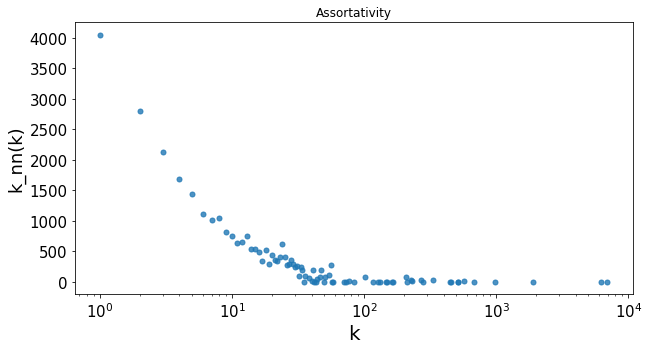

In [59]:
from random import sample


G = g.to_undirected().copy()

conn_comps = sorted(nx.connected_components(G), key=len, reverse=True) 
#keep only biggest component and sample graph for speedup computation time

G.remove_nodes_from([n for n in G if n not in set(conn_comps[0])])
sampled_nodes = sample(G.nodes, 25000)  

G.remove_nodes_from([n for n in G if n not in set(sampled_nodes)])



conn_comps_sample = sorted(nx.connected_components(G), key=len, reverse=True)

#keep only giant component
G.remove_nodes_from([n for n in G if n not in set(conn_comps_sample[0])]) 

nx.degree_assortativity_coefficient(G)

knn = nx.k_nearest_neighbors(G) #calculate the average nearest neighbor degree of nodes with degree k.

knn = dict(sorted(knn.items()))

plt.figure(figsize=(10,5))



plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)

plt.xlabel("k", fontsize=20)

plt.ylabel("k_nn(k)",fontsize=18)

plt.xticks(fontsize=15)
plt.xscale('log')

plt.yticks(fontsize=15)

plt.title("Assortativity")
plt.savefig('assortativity.pdf',format='pdf')


plt.show()

In [ ]:
#calculate degree assortativity coefficient
r = nx.degree_assortativity_coefficient(G)

print(f"{r:3.1f}")